### RMI 8450 Project: Customer Churning Prediction 

### We want to predict which customers are likely to leave their credit card service from a bank. We will compare four models; Logistic Regression, Random Forest, XGBoost, and CatBoost.

### Data for Customer Churning Prediction

* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable
* Customer_Age: Demographic variable - Customer's Age in Years
* Gender : Demographic variable - M=Male, F=Female
* Dependent_count: Demographic variable - Number of dependents
* Education_Level: Demographic variable - Educational Qualification of the account holder 
	(example: high school, college graduate, etc.)
* Marital_Status: Demographic variable - Married, Single, Divorced, Unknown
* Income_Category: Demographic variable - Annual Income Category of the account holder 
	(< 40K, 40K - 60K, 60K - 80K, 80K-120K, > 120K, Unknown)
* Card_Category: Product Variable - Type of Card 
	(Blue, Silver, Gold, Platinum)
* Months_on_book: Period of relationship with bank
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: Total Revolving Balance on the Credit Card
* Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
* Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
* Avg_Utilization_Ratio: Average Card Utilization Ratio

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.options.display.max_rows=None
pd.options.display.max_columns=None

In [2]:
# Read CSV file
data=pd.read_csv("BankChurners.csv", sep=',', header=0)

In [3]:
data.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
0              39                         5                       1   
1              44                         6                       1   
2              36                         4                       1   
3              34                         3                       4   
4              21                         5                       1   

   Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0                      3       12691.0                  777          11914.0   
1                      2        8256.0                  864           7392.0   
2                      0        3418.0                    0           3418.0   
3                      1        3313.0                 2517            796.0   
4                      0        4716.0                    0           4716.0   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   Avg_Utilization_Ratio  \
0                  0.061   
1                  0.105   
2                  0.000   
3                  0.760   
4                  0.000   

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1  \
0                                           0.000093                                                                                    
1                                           0.000057                                                                                    
2                                           0.000021                                                                                    
3                                           0.000134                                                                                    
4                                           0.000022                                                                                    

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2  
0                                            0.99991                                                                                   
1                                            0.99994                                                                                   
2                                            0.99998                                                                                   
3                                            0.99987                                                                                   
4                                            0.99998

In [4]:
data.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [5]:
# Drop columns
data = data.drop(columns =['CLIENTNUM',
                          'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
                          'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'])

Drop these three columns because they are not necessary to build models.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

Even though all columns have 10127 rows of non-null data, there are actually 'Unknown' values in some of them. First, I am going to build models as is. And then I will build models after treating the missing values.

In [7]:
data.describe(include='all')

Attrition_Flag  Customer_Age Gender  Dependent_count  \
count               10127  10127.000000  10127     10127.000000   
unique                  2           NaN      2              NaN   
top     Existing Customer           NaN      F              NaN   
freq                 8500           NaN   5358              NaN   
mean                  NaN     46.325960    NaN         2.346203   
std                   NaN      8.016814    NaN         1.298908   
min                   NaN     26.000000    NaN         0.000000   
25%                   NaN     41.000000    NaN         1.000000   
50%                   NaN     46.000000    NaN         2.000000   
75%                   NaN     52.000000    NaN         3.000000   
max                   NaN     73.000000    NaN         5.000000   

       Education_Level Marital_Status Income_Category Card_Category  \
count            10127          10127           10127         10127   
unique               7              4               6             4   
top           Graduate        Married  Less than $40K          Blue   
freq              3128           4687            3561          9436   
mean               NaN            NaN             NaN           NaN   
std                NaN            NaN             NaN           NaN   
min                NaN            NaN             NaN           NaN   
25%                NaN            NaN             NaN           NaN   
50%                NaN            NaN             NaN           NaN   
75%                NaN            NaN             NaN           NaN   
max                NaN            NaN             NaN           NaN   

        Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
count     10127.000000              10127.000000            10127.000000   
unique             NaN                       NaN                     NaN   
top                NaN                       NaN                     NaN   
freq               NaN                       NaN                     NaN   
mean         35.928409                  3.812580                2.341167   
std           7.986416                  1.554408                1.010622   
min          13.000000                  1.000000                0.000000   
25%          31.000000                  3.000000                2.000000   
50%          36.000000                  4.000000                2.000000   
75%          40.000000                  5.000000                3.000000   
max          56.000000                  6.000000                6.000000   

        Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
count            10127.000000  10127.000000         10127.000000   
unique                    NaN           NaN                  NaN   
top                       NaN           NaN                  NaN   
freq                      NaN           NaN                  NaN   
mean                 2.455317   8631.953698          1162.814061   
std                  1.106225   9088.776650           814.987335   
min                  0.000000   1438.300000             0.000000   
25%                  2.000000   2555.000000           359.000000   
50%                  2.000000   4549.000000          1276.000000   
75%                  3.000000  11067.500000          1784.000000   
max                  6.000000  34516.000000          2517.000000   

        Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  \
count      10127.000000          10127.000000     10127.000000   
unique              NaN                   NaN              NaN   
top                 NaN                   NaN              NaN   
freq                NaN                   NaN              NaN   
mean        7469.139637              0.759941      4404.086304   
std         9090.685324              0.219207      3397.129254   
min            3.000000              0.000000       510.000000   
25%         1324.500000              0.631000      2155.500000   
50%         3474.000000      

### EDA

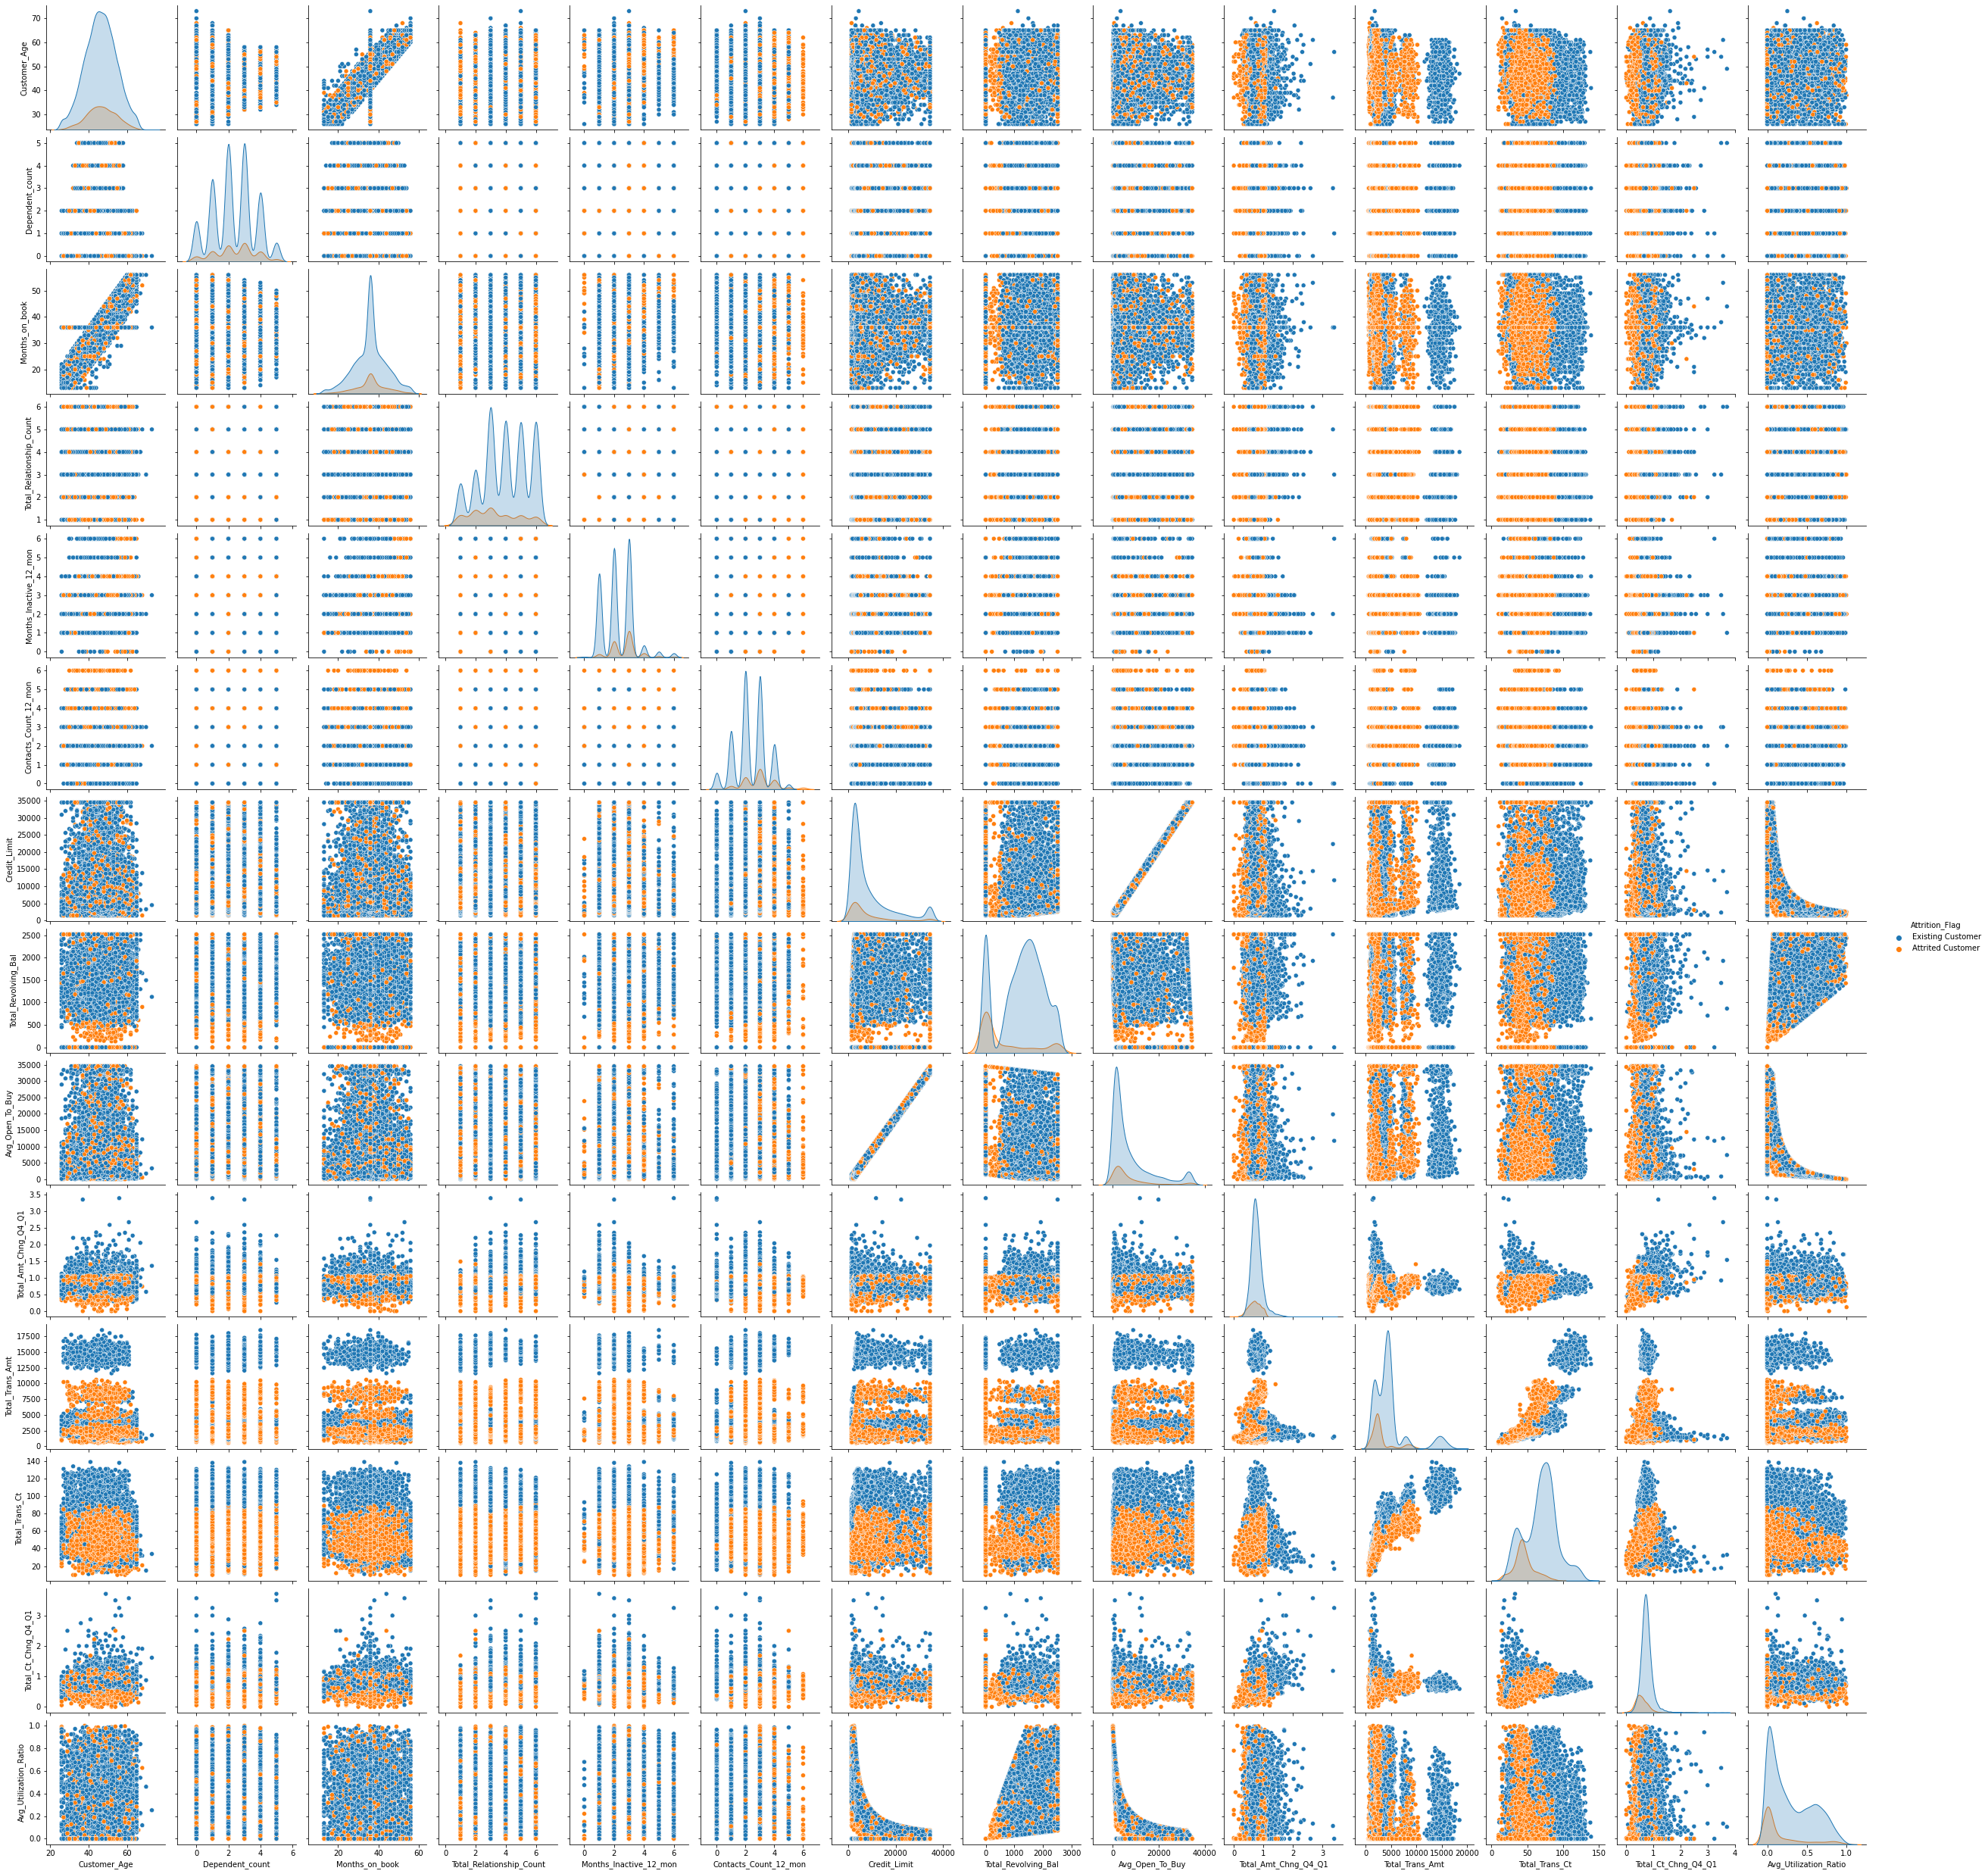

In [8]:
sns.pairplot(data, hue='Attrition_Flag')

The yellow dots are customers who left('Attrited Customer'). There are concentrated yellow areas at some variables. Others are just a mixture of 'Existing Customer' and 'Attrited Customer' without any pattern.

<AxesSubplot:xlabel='Attrition_Flag', ylabel='count'>

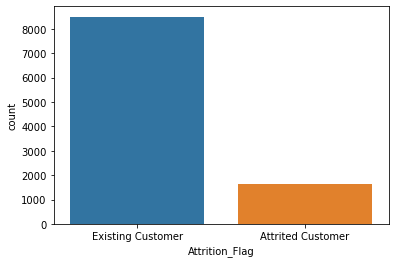

In [8]:
# Target variable
sns.countplot(x='Attrition_Flag', data=data)

In [9]:
# Check the imbalance ratio
from collections import Counter
count = Counter(data.Attrition_Flag)
ratio = count['Attrited Customer']/(count['Existing Customer']+count['Attrited Customer'])
print(count)
print("The imbalance ratio is ", ratio*100,'%')

Counter({'Existing Customer': 8500, 'Attrited Customer': 1627})
The imbalance ratio is  16.065962279055988 %


About 16.07% of the customers left the bank's credit card services and this is imbalanced.

### The Categorical Features' Visualization

In [10]:
# Categorical features
for i in data.columns[data.dtypes == 'object']:
    print(i)

Attrition_Flag
Gender
Education_Level
Marital_Status
Income_Category
Card_Category


<AxesSubplot:xlabel='Gender', ylabel='count'>

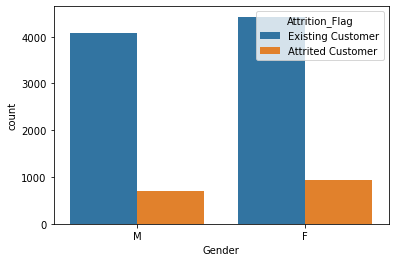

In [11]:
sns.countplot(x = 'Gender', hue='Attrition_Flag', data=data)

<AxesSubplot:xlabel='count', ylabel='Education_Level'>

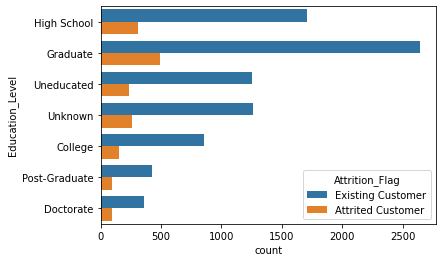

In [13]:
sns.countplot(y = 'Education_Level', hue='Attrition_Flag', data=data)

<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

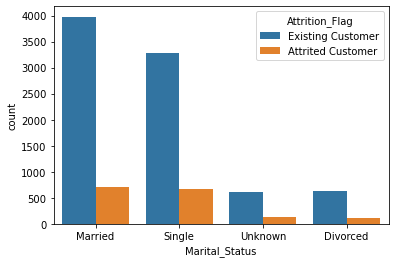

In [14]:
sns.countplot(x = 'Marital_Status', hue='Attrition_Flag', data=data)

<AxesSubplot:xlabel='count', ylabel='Income_Category'>

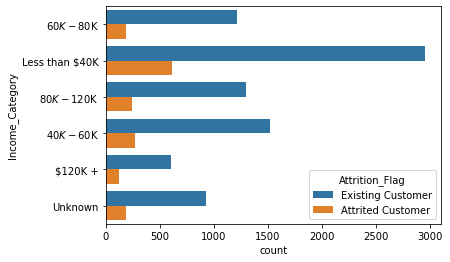

In [15]:
sns.countplot(y = 'Income_Category', hue='Attrition_Flag', data=data)

<AxesSubplot:xlabel='Card_Category', ylabel='count'>

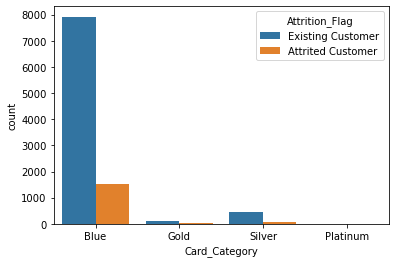

In [16]:
sns.countplot(x = 'Card_Category', hue='Attrition_Flag', data=data)

### Histograms for Numerical Features

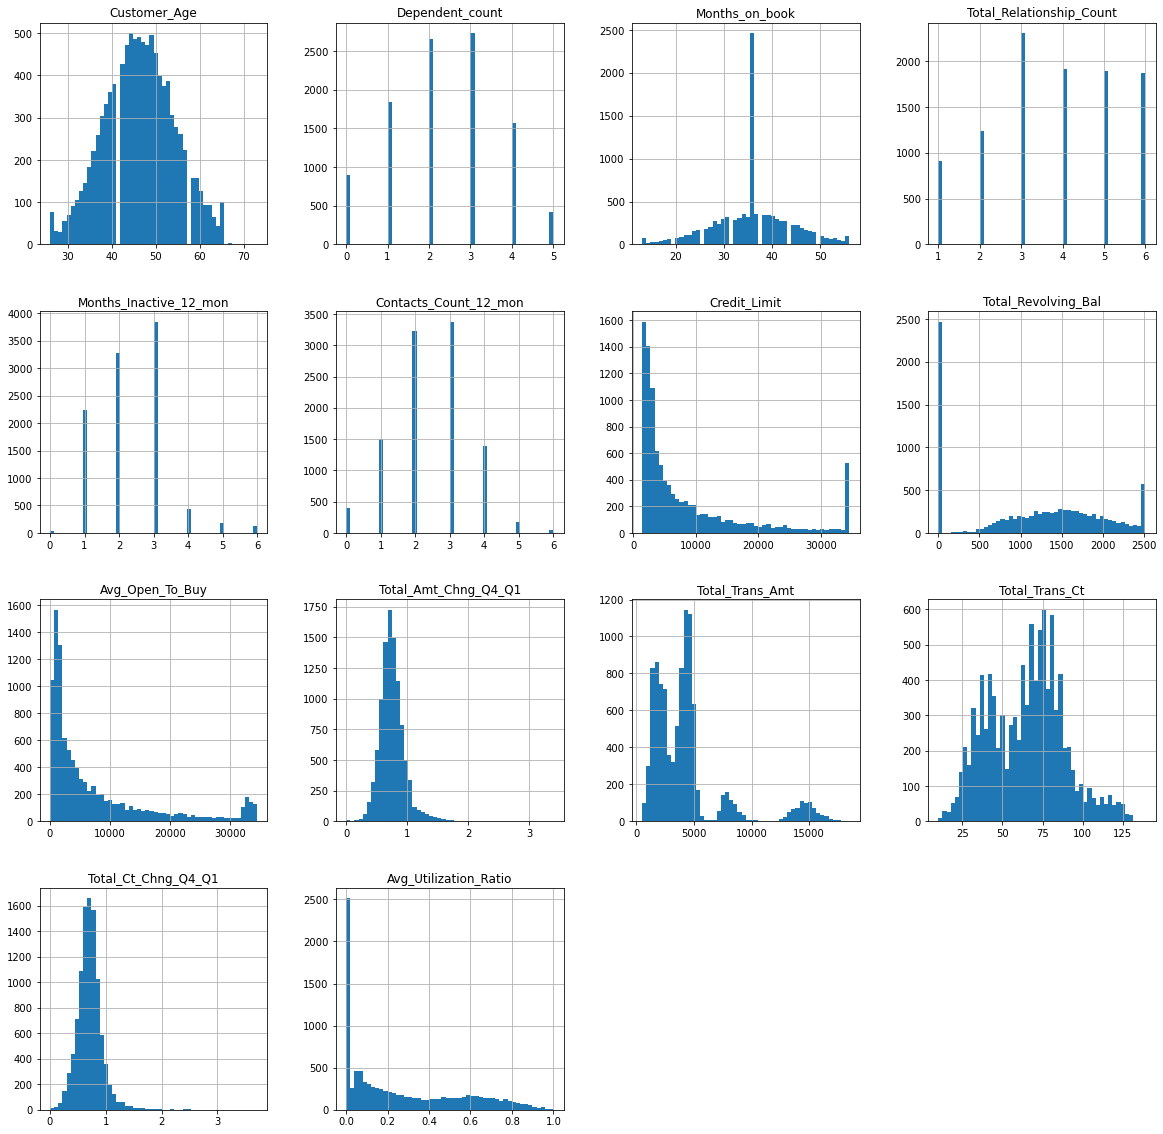

In [17]:
data.hist(bins = 50, figsize = (20, 20))
plt.show()

### Relational Plots

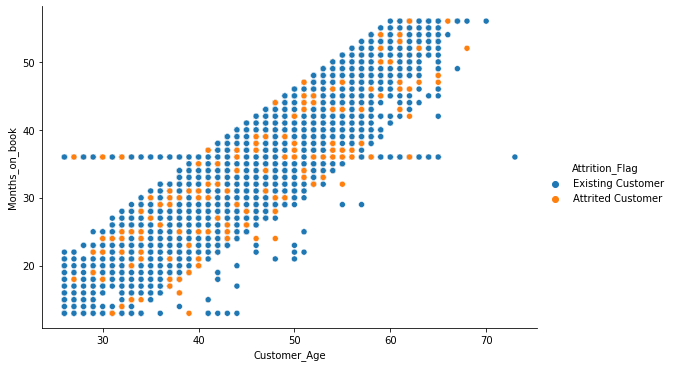

In [18]:
scatterplot1 = sns.relplot(
    x = "Customer_Age",
    y = "Months_on_book",
    data = data,
    hue = "Attrition_Flag",
    height = 5,
    aspect = 1.5,
)
plt.show(scatterplot1)
plt.close()

It looks like 'Customer_Age' and 'Months_on_book' have a positive relationship. Also, some customers have had relationships with the bank for nearly 36 months, regardless of their age. There are many new customers under age 35, but after the age of 45, there is not a new customer.

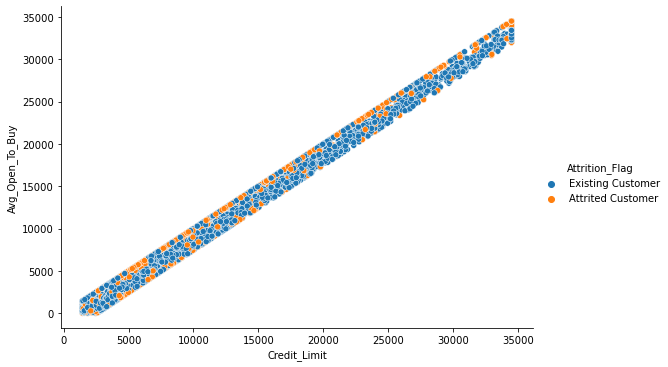

In [19]:
scatterplot2 = sns.relplot(
    x = "Credit_Limit",
    y = "Avg_Open_To_Buy",
    data = data,
    hue = "Attrition_Flag",
    height = 5,
    aspect = 1.5,
)
plt.show(scatterplot2)
plt.close()

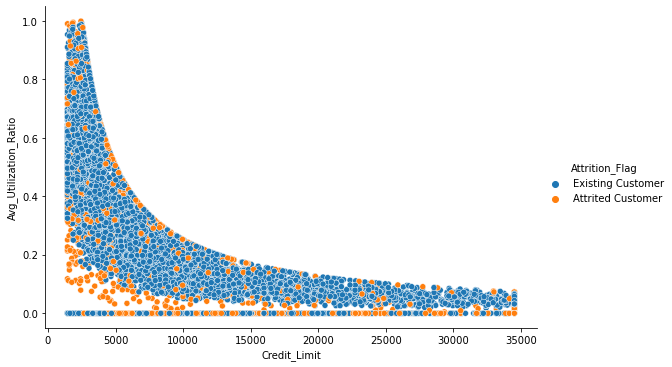

In [21]:
scatterplot3 = sns.relplot(
    x = "Credit_Limit",
    y = "Avg_Utilization_Ratio",
    data = data,
    hue = "Attrition_Flag",
    height = 5,
    aspect = 1.5,
)
plt.show(scatterplot3)
plt.close()

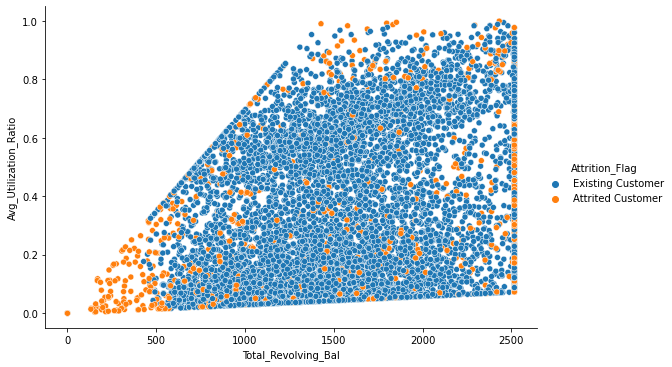

In [22]:
scatterplot4 = sns.relplot(
    x = "Total_Revolving_Bal",
    y = "Avg_Utilization_Ratio",
    data = data,
    hue = "Attrition_Flag",
    height = 5,
    aspect = 1.5,
)
plt.show(scatterplot4)
plt.close()

It shows that if the total revolving balance on the credit card is less than 500 and the average card utilization ratio is less than 0.3, the customers in this group are most likely to leave the service.

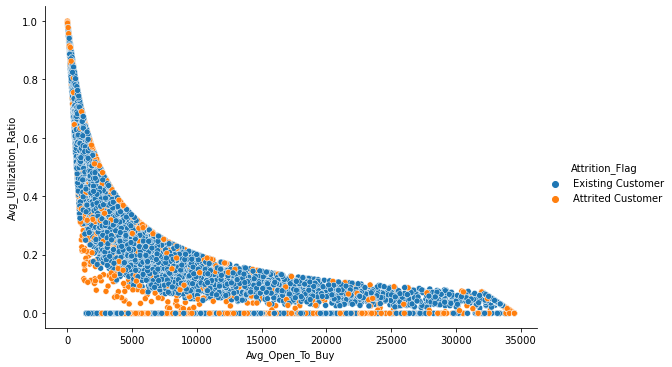

In [23]:
scatterplot5 = sns.relplot(
    x = "Avg_Open_To_Buy",
    y = "Avg_Utilization_Ratio",
    data = data,
    hue = "Attrition_Flag",
    height = 5,
    aspect = 1.5,
)
plt.show(scatterplot5)
plt.close()

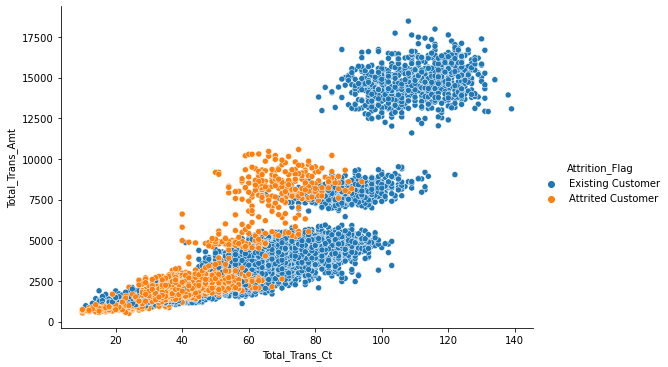

In [24]:
scatterplot6 = sns.relplot(
    x = "Total_Trans_Ct",
    y = "Total_Trans_Amt",
    data = data,
    hue = "Attrition_Flag",
    height = 5,
    aspect = 1.5,
)
plt.show(scatterplot6)
plt.close()

It shows that if the total transaction amount for the last 12 months is over 12500 and the total transaction count for the last 12 months is more than 100, the customers in this group are less likely to leave the service. Also, among distinguished groups, if the total transaction count is small, there are highly concentrated attrited customers.

### Data Preparation

In [12]:
# Transform Data
data11 = pd.get_dummies(data,prefix_sep="_")
data11.head()

Customer_Age  Dependent_count  Months_on_book  Total_Relationship_Count  \
0            45                3              39                         5   
1            49                5              44                         6   
2            51                3              36                         4   
3            40                4              34                         3   
4            40                3              21                         5   

   Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
0                       1                      3       12691.0   
1                       1                      2        8256.0   
2                       1                      0        3418.0   
3                       4                      1        3313.0   
4                       1                      0        4716.0   

   Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0                  777          11914.0                 1.335   
1                  864           7392.0                 1.541   
2                    0           3418.0                 2.594   
3                 2517            796.0                 1.405   
4                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0             1144              42                1.625   
1             1291              33                3.714   
2             1887              20                2.333   
3             1171              20                2.333   
4              816              28                2.500   

   Avg_Utilization_Ratio  Attrition_Flag_Attrited Customer  \
0                  0.061                                 0   
1                  0.105                                 0   
2                  0.000                                 0   
3                  0.760                                 0   
4                  0.000                                 0   

   Attrition_Flag_Existing Customer  Gender_F  Gender_M  \
0                                 1         0         1   
1                                 1         1         0   
2                                 1         0         1   
3                                 1         1         0   
4                                 1         0         1   

   Education_Level_College  Education_Level_Doctorate  \
0                        0                          0   
1                        0                          0   
2                        0                          0   
3                        0                          0   
4                        0                          0   

   Education_Level_Graduate  Education_Level_High School  \
0                         0                            1   
1                         1                            0   
2                         1                            0   
3                         0                            1   
4                         0                            0   

   Education_Level_Post-Graduate  Education_Level_Uneducated  \
0                              0                           0   
1                              0                           0   
2                              0                           0   
3                              0                           0   
4                              0                           1   

   Education_Level_Unknown  Marital_Status_Divorced  Marital_Status_Married  \
0                        0                        0                       1   
1                        0                        0                       0   
2                        0                        0                       1   
3                        0                        0                       0   
4                        0                        0                       1   

   Marital_Status_Single  Marital_Status_Unknown  Income_Category_$120K +  \
0                     

In [14]:
data22 = data11.drop(columns=['Attrition_Flag_Existing Customer'])
data22.head()

Customer_Age  Dependent_count  Months_on_book  Total_Relationship_Count  \
0            45                3              39                         5   
1            49                5              44                         6   
2            51                3              36                         4   
3            40                4              34                         3   
4            40                3              21                         5   

   Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
0                       1                      3       12691.0   
1                       1                      2        8256.0   
2                       1                      0        3418.0   
3                       4                      1        3313.0   
4                       1                      0        4716.0   

   Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0                  777          11914.0                 1.335   
1                  864           7392.0                 1.541   
2                    0           3418.0                 2.594   
3                 2517            796.0                 1.405   
4                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0             1144              42                1.625   
1             1291              33                3.714   
2             1887              20                2.333   
3             1171              20                2.333   
4              816              28                2.500   

   Avg_Utilization_Ratio  Attrition_Flag_Attrited Customer  Gender_F  \
0                  0.061                                 0         0   
1                  0.105                                 0         1   
2                  0.000                                 0         0   
3                  0.760                                 0         1   
4                  0.000                                 0         0   

   Gender_M  Education_Level_College  Education_Level_Doctorate  \
0         1                        0                          0   
1         0                        0                          0   
2         1                        0                          0   
3         0                        0                          0   
4         1                        0                          0   

   Education_Level_Graduate  Education_Level_High School  \
0                         0                            1   
1                         1                            0   
2                         1                            0   
3                         0                            1   
4                         0                            0   

   Education_Level_Post-Graduate  Education_Level_Uneducated  \
0                              0                           0   
1                              0                           0   
2                              0                           0   
3                              0                           0   
4                              0                           1   

   Education_Level_Unknown  Marital_Status_Divorced  Marital_Status_Married  \
0                        0                        0                       1   
1                        0                        0                       0   
2                        0                        0                       1   
3                        0                        0                       0   
4                        0                        0                       1   

   Marital_Status_Single  Marital_Status_Unknown  Income_Category_$120K +  \
0                      0                       0                        0   
1                      1                       0                        0   
2                      0                       0                        0   
3                      0  

We are interested only in 'Attrited Customer', and this is the target variable. It is 1 for the Attrited Customer, and 0 for the Existing Customer.

In [15]:
# The correlation between the target and other variables.
data22.corr()

Customer_Age  Dependent_count  \
Customer_Age                          1.000000        -0.122254   
Dependent_count                      -0.122254         1.000000   
Months_on_book                        0.788912        -0.103062   
Total_Relationship_Count             -0.010931        -0.039076   
Months_Inactive_12_mon                0.054361        -0.010768   
Contacts_Count_12_mon                -0.018452        -0.040505   
Credit_Limit                          0.002476         0.068065   
Total_Revolving_Bal                   0.014780        -0.002688   
Avg_Open_To_Buy                       0.001151         0.068291   
Total_Amt_Chng_Q4_Q1                 -0.062042        -0.035439   
Total_Trans_Amt                      -0.046446         0.025046   
Total_Trans_Ct                       -0.067097         0.049912   
Total_Ct_Chng_Q4_Q1                  -0.012143         0.011087   
Avg_Utilization_Ratio                 0.007114        -0.037135   
Attrition_Flag_Attrited Customer      0.018203         0.018991   
Gender_F                              0.017312        -0.004563   
Gender_M                             -0.017312         0.004563   
Education_Level_College              -0.014788         0.003369   
Education_Level_Doctorate             0.025199        -0.003368   
Education_Level_Graduate             -0.000203         0.000671   
Education_Level_High School           0.001199        -0.013127   
Education_Level_Post-Graduate        -0.022081         0.009459   
Education_Level_Uneducated            0.005057         0.002190   
Education_Level_Unknown               0.005377         0.004922   
Marital_Status_Divorced              -0.042614         0.006697   
Marital_Status_Married                0.047364         0.014385   
Marital_Status_Single                -0.011248        -0.040707   
Marital_Status_Unknown               -0.026694         0.041743   
Income_Category_$120K +               0.044332         0.024831   
Income_Category_$40K - $60K          -0.013804        -0.013493   
Income_Category_$60K - $80K          -0.017869         0.028975   
Income_Category_$80K - $120K          0.005381         0.047611   
Income_Category_Less than $40K       -0.002573        -0.046785   
Income_Category_Unknown              -0.002264        -0.019205   
Card_Category_Blue                    0.021409        -0.027671   
Card_Category_Gold                   -0.011901         0.027035   
Card_Category_Platinum                0.006515         0.003555   
Card_Category_Silver                 -0.019425         0.017322   

                                  Months_on_book  Total_Relationship_Count  \
Customer_Age                            0.788912                 -0.010931   
Dependent_count                        -0.103062                 -0.039076   
Months_on_book                          1.000000                 -0.009203   
Total_Relationship_Count               -0.009203                  1.000000   
Months_Inactive_12_mon                  0.074164                 -0.003675   
Contacts_Count_12_mon                  -0.010774                  0.055203   
Credit_Limit                            0.007507                 -0.071386   
Total_Revolving_Bal                     0.008623                  0.013726   
Avg_Open_To_Buy                         0.006732                 -0.072601   
Total_Amt_Chng_Q4_Q1                   -0.048959                  0.050119   
Total_Trans_Amt                        -0.038591                 -0.347229   
Total_Trans_Ct                         -0.049819                 -0.241891   
Total_Ct_Chng_Q4_Q1                    -0.014072                  0.040831   
Avg_Utilization_Ratio                  -0.007541                  0.067663   
Attrition_Flag_Attrited Customer        0.013687                 -0.150005   
Gender_F                                0.006728                 -0.003157   
Gender_M                               -0.006728                  0.003157   
Education_Level_

Text(0.5, 1.0, 'Correlation Matrix')

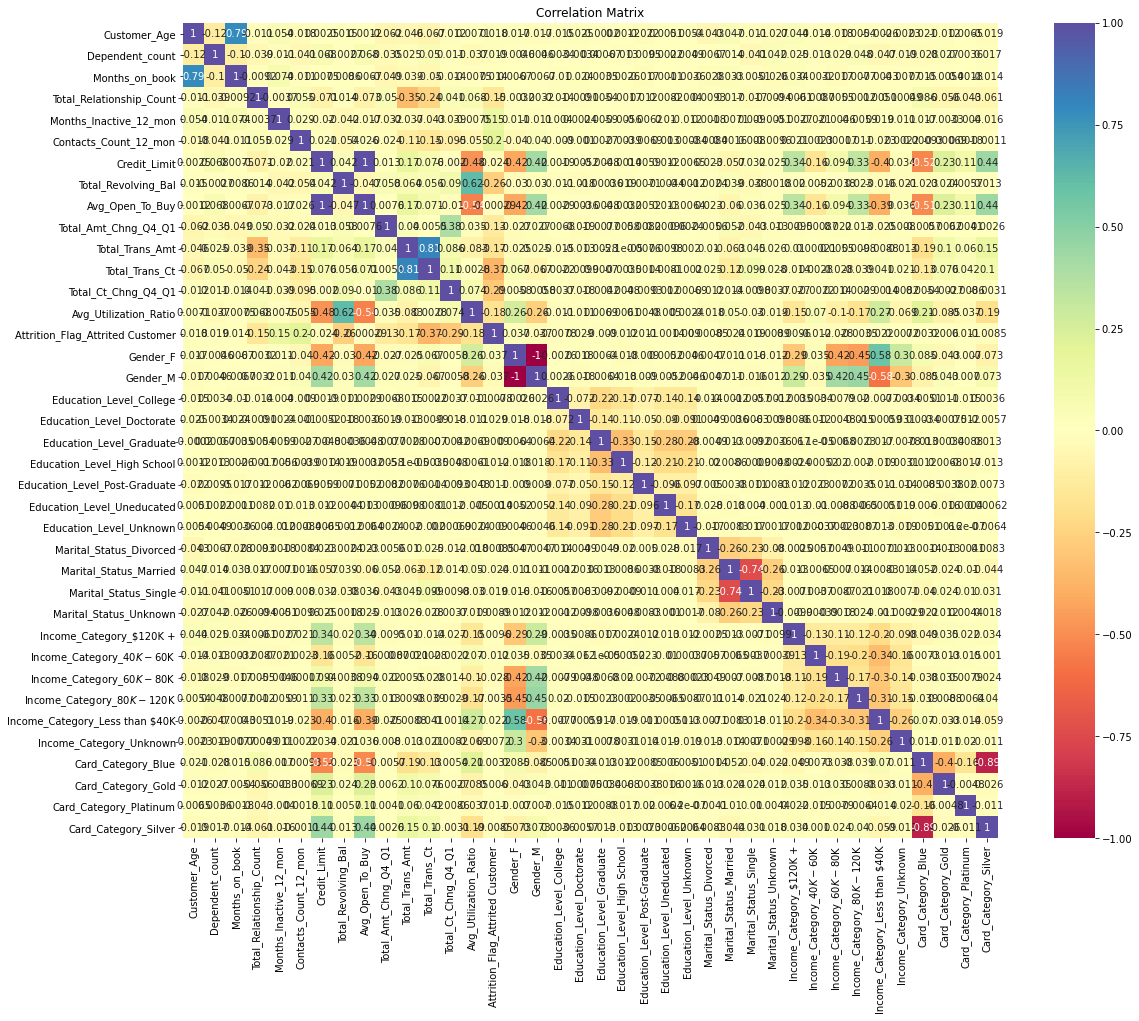

In [37]:
# Heatmap
fig, ax = plt.subplots(figsize=(20,15))
sns.heatmap(data22.corr(), cmap='Spectral', annot=True, square=True)
plt.title('Correlation Matrix')

While 'Months_Inactive_12_mon' and 'Contacts_Count_12_mon' have positive correlations with the target, 'Total_Revolving_Bal', 'Total_Trans_Ct', and 'Total_Ct_Chng_Q4_Q1' have negative correlations with the target. 

### Oversample data with SMOTE

In [16]:
# Assign target variable
X = data22.drop(columns = ['Attrition_Flag_Attrited Customer'])
y = data22['Attrition_Flag_Attrited Customer']

In [17]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(random_state=123)
X, y = oversample.fit_resample(X, y)

Since the data is imbalanced, I use SMOTE to oversample data.

In [18]:
print(np.count_nonzero(y==0),np.count_nonzero(y==1))

8500 8500


After oversampling, both existing and attrited customers numbers are equal.

### Train, test data split

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=123)

In [20]:
print(len(X_train),len(X_test),len(y_train),len(y_test))

11900 5100 11900 5100


In [21]:
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

def clf(X_tst, y_tst, model):
    # predicted label for the test data
    y_pred = model.predict(X_tst) 
    # predicted score for the test data 
    y_pred_proba = model.predict_proba(X_tst)[:,1] 
    # Confusion Matrix
    metrics.plot_confusion_matrix(model, X_tst, y_tst, cmap=plt.cm.Blues) 
    # Classification reprot
    target_names = ['0','1']
    print(metrics.classification_report(y_tst, y_pred, target_names = ['Existing Customer','Attrited Customer'], digits=4))

### Models

### 1. Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter = 5000, random_state=123)  
lr.fit(X_train, y_train)

LogisticRegression(max_iter=5000, random_state=123)

                   precision    recall  f1-score   support

Existing Customer     0.8918    0.9401    0.9153      4172
Attrited Customer     0.9368    0.8862    0.9108      4183

         accuracy                         0.9131      8355
        macro avg     0.9143    0.9131    0.9130      8355
     weighted avg     0.9143    0.9131    0.9130      8355



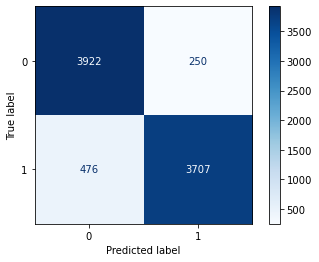

In [146]:
# Logistic regression train result
clf(X_train, y_train, lr)

                   precision    recall  f1-score   support

Existing Customer     0.8992    0.9343    0.9164      1796
Attrited Customer     0.9312    0.8947    0.9126      1785

         accuracy                         0.9145      3581
        macro avg     0.9152    0.9145    0.9145      3581
     weighted avg     0.9152    0.9145    0.9145      3581



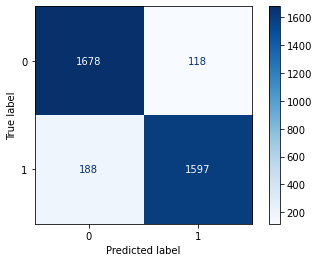

In [147]:
# Logistic regression test result
clf(X_test, y_test, lr)

Using logistic regression, the precision score is better than the recall score with the test data.

### 2. Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200, random_state=123)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=123)

                   precision    recall  f1-score   support

Existing Customer     1.0000    1.0000    1.0000      5942
Attrited Customer     1.0000    1.0000    1.0000      5958

         accuracy                         1.0000     11900
        macro avg     1.0000    1.0000    1.0000     11900
     weighted avg     1.0000    1.0000    1.0000     11900



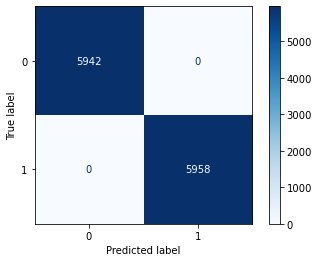

In [53]:
# Random forest train result
clf(X_train, y_train, rf)

                   precision    recall  f1-score   support

Existing Customer     0.9873    0.9707    0.9789      2558
Attrited Customer     0.9710    0.9874    0.9791      2542

         accuracy                         0.9790      5100
        macro avg     0.9791    0.9790    0.9790      5100
     weighted avg     0.9792    0.9790    0.9790      5100



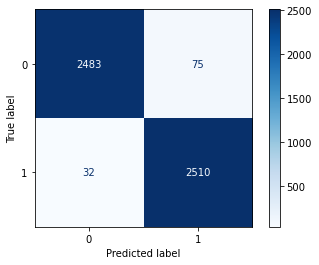

In [54]:
# Random forest test result
clf(X_test, y_test, rf)

It seems like there is an overfitting issue with random forest. But its performance is better than that of logistic regression with the test data.

### 3. XGBoost

In [34]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators = 500, max_depth = 3, random_state=123)
xgb.fit(X_train, y_train)

[22:22:46] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=8, num_parallel_tree=1, random_state=123,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

                   precision    recall  f1-score   support

Existing Customer     1.0000    1.0000    1.0000      5942
Attrited Customer     1.0000    1.0000    1.0000      5958

         accuracy                         1.0000     11900
        macro avg     1.0000    1.0000    1.0000     11900
     weighted avg     1.0000    1.0000    1.0000     11900



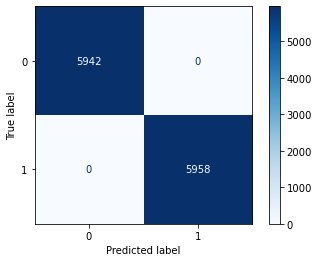

In [56]:
# XGBoost train result
clf(X_train, y_train, xgb)

                   precision    recall  f1-score   support

Existing Customer     0.9874    0.9824    0.9849      2558
Attrited Customer     0.9824    0.9874    0.9849      2542

         accuracy                         0.9849      5100
        macro avg     0.9849    0.9849    0.9849      5100
     weighted avg     0.9849    0.9849    0.9849      5100



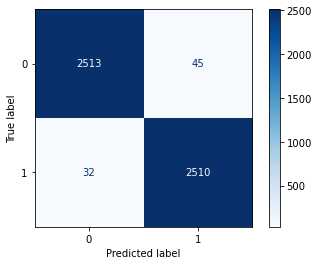

In [57]:
# XGBoost test result
clf(X_test, y_test, xgb)

With test data, XGBoost has great precision and recall score and outperforms the logistic regression. And both scores are slightly better than those of random forest.

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

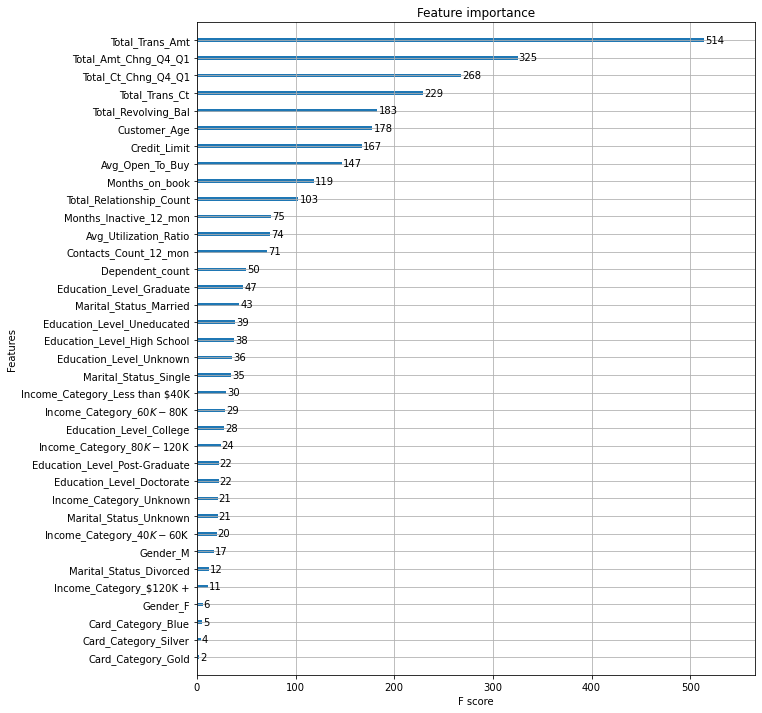

In [58]:
from xgboost import plot_importance
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb, ax=ax)

With XGBoost, 'Total_Trans_Amt', 'Total_Amt_Chng_Q4_Q1', 'Total_Ct_Chng_Q4_Q1', and 'Total_Trans_Ct' are top four important features.

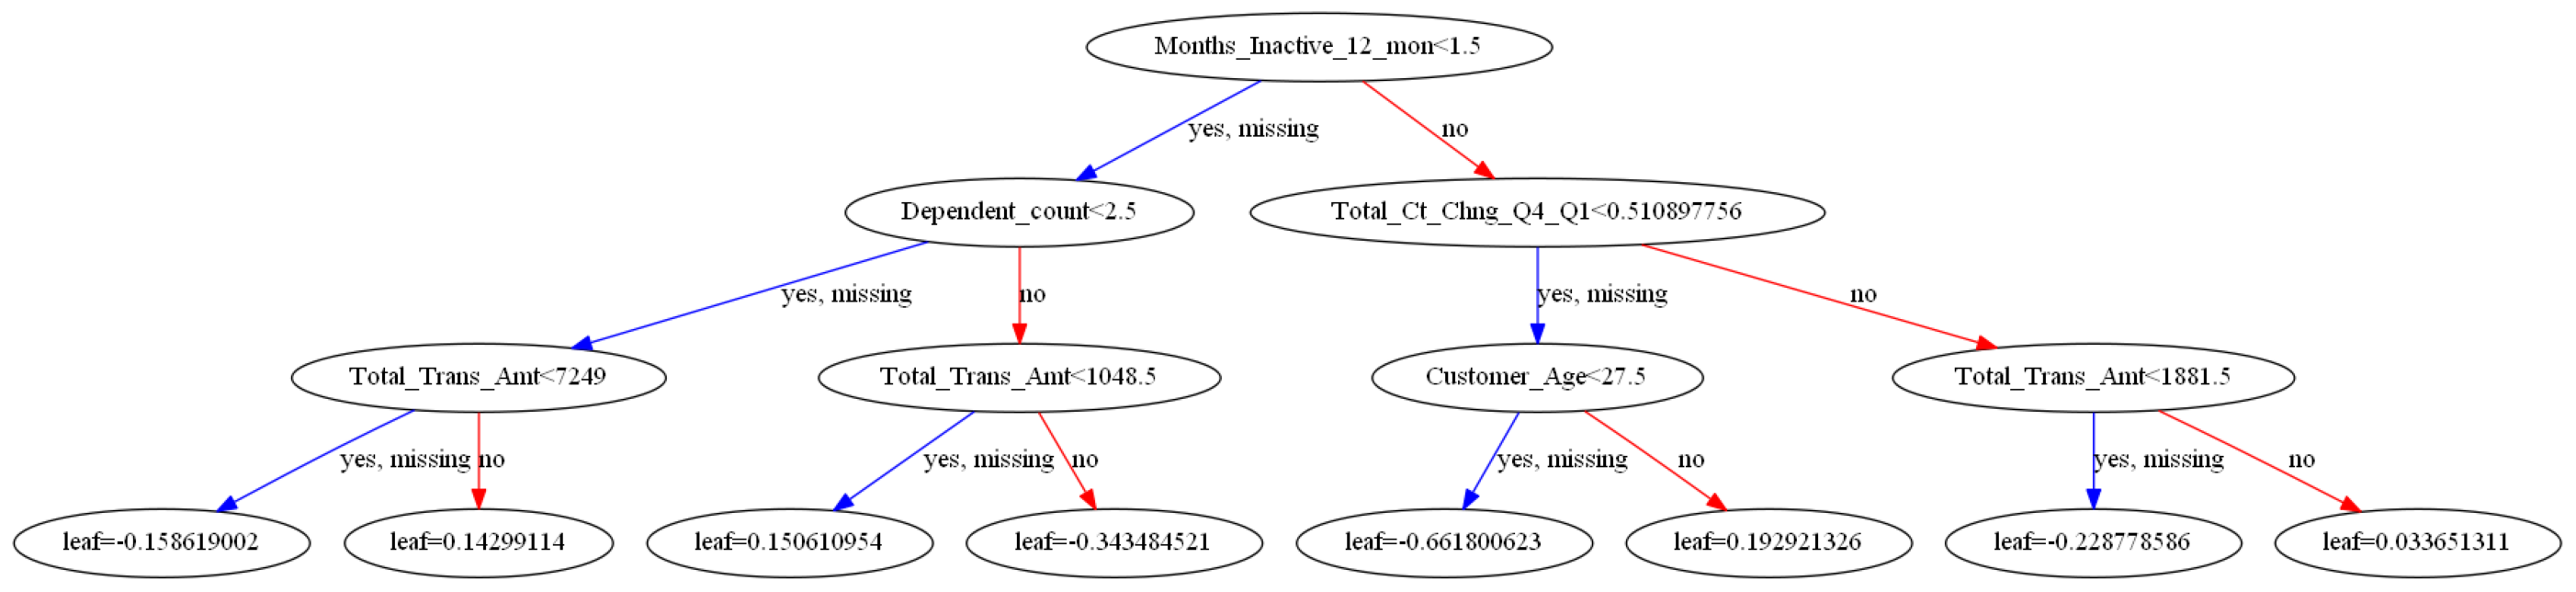

In [59]:
# XGBoost tree plot
from xgboost import plot_tree

plot_tree(xgb, num_trees = 11)
fig = plt.gcf()
fig.set_size_inches(50,30)

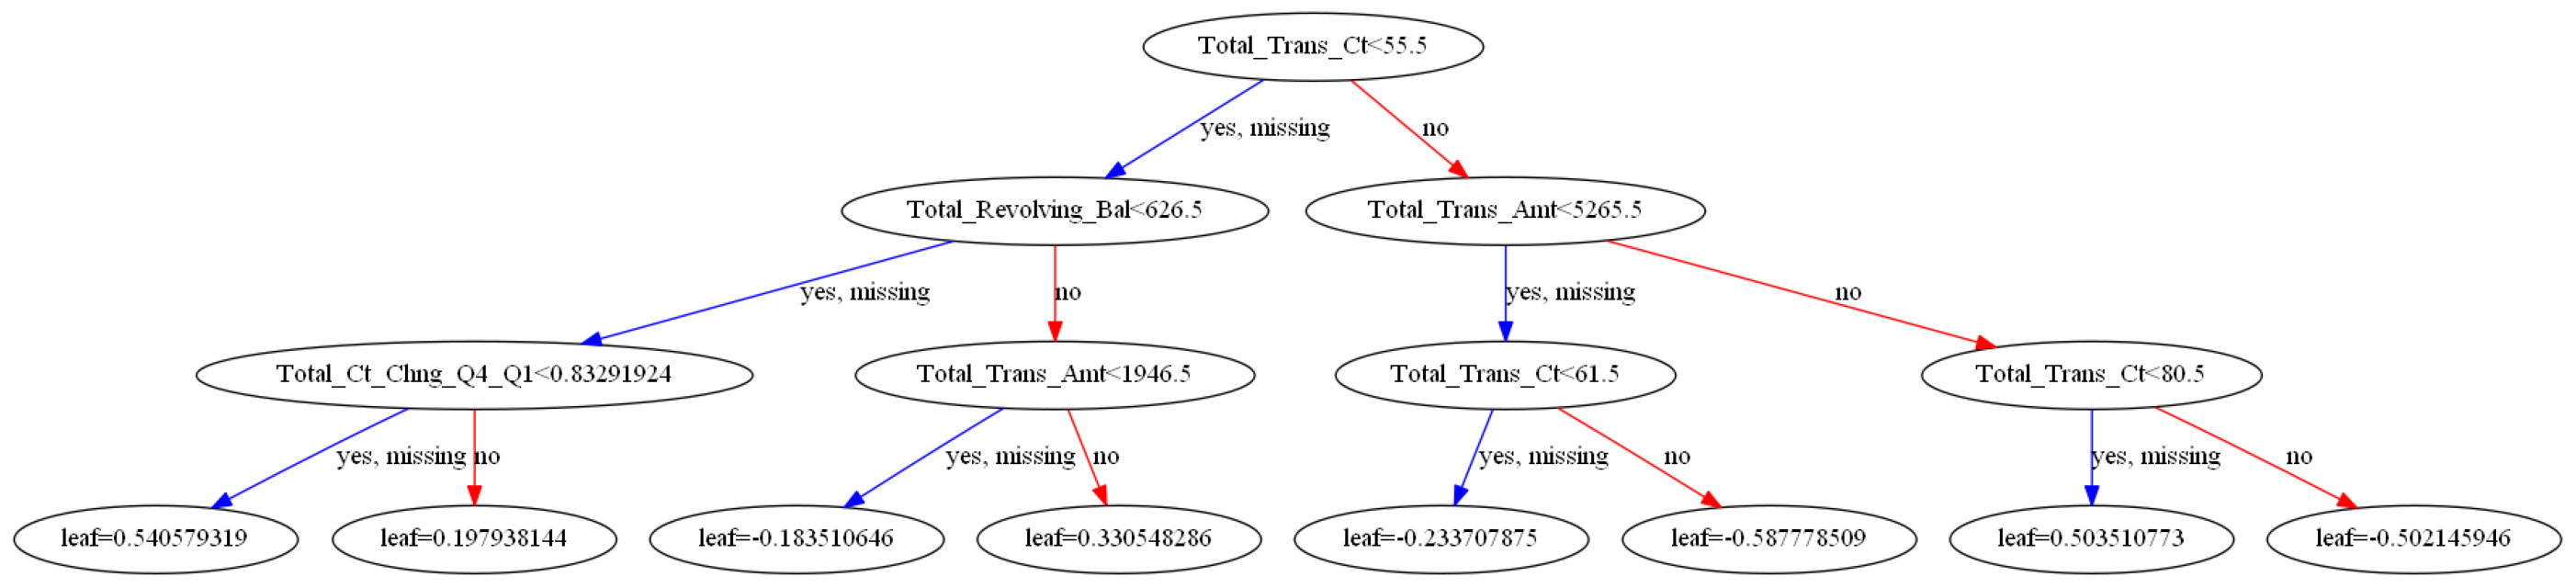

In [60]:
plot_tree(xgb, num_trees = 0)
fig = plt.gcf()
fig.set_size_inches(50,30)

Each tree of the XGBoost has different variables. 

### 4. CatBoost

In [35]:
from catboost import CatBoostClassifier

cat = CatBoostClassifier(loss_function='Logloss',random_state = 123, iterations =200, verbose = 0)
cat.fit(X_train, y_train)

                   precision    recall  f1-score   support

Existing Customer     0.9987    0.9980    0.9983      5942
Attrited Customer     0.9980    0.9987    0.9983      5958

         accuracy                         0.9983     11900
        macro avg     0.9983    0.9983    0.9983     11900
     weighted avg     0.9983    0.9983    0.9983     11900



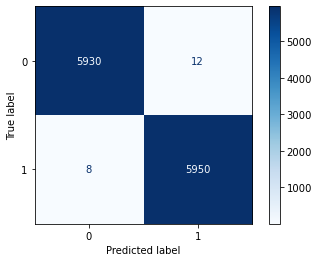

In [62]:
# CatBoost train result
clf(X_train, y_train, cat)

                   precision    recall  f1-score   support

Existing Customer     0.9870    0.9828    0.9849      2558
Attrited Customer     0.9828    0.9870    0.9849      2542

         accuracy                         0.9849      5100
        macro avg     0.9849    0.9849    0.9849      5100
     weighted avg     0.9849    0.9849    0.9849      5100



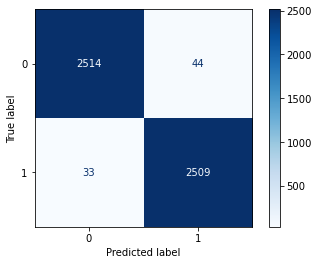

In [63]:
# CatBoost test result
clf(X_test, y_test, cat)

With the test data, CatBoost's recall score is the best among all the models we tried.

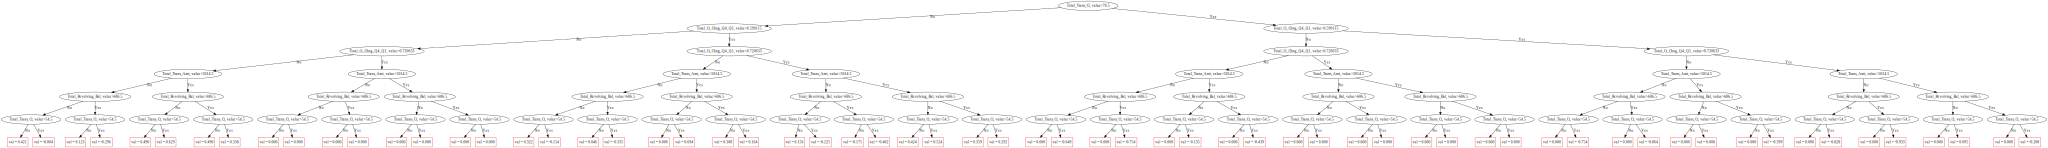

In [64]:
# CatBoost tree plot
from catboost import Pool
cat.plot_tree(tree_idx=0, pool=X_test)

### Models without 'Unknown' values

The data has 'Unknown' values and let's try models without these missing values.

### Data Preparation

In [22]:
# Read the file and drop unnecessary columns
data = pd.read_csv("BankChurners.csv", sep=',', header=0)
data = data.drop(columns =['CLIENTNUM',
                          'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
                          'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'])
# Delete rows with 'Unknown' value.
data.replace({'Unknown':np.nan},inplace=True)
data = data.dropna()
data.head()

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
0  Existing Customer            45      M                3     High School   
1  Existing Customer            49      F                5        Graduate   
2  Existing Customer            51      M                3        Graduate   
4  Existing Customer            40      M                3      Uneducated   
5  Existing Customer            44      M                2        Graduate   

  Marital_Status Income_Category Card_Category  Months_on_book  \
0        Married     $60K - $80K          Blue              39   
1         Single  Less than $40K          Blue              44   
2        Married    $80K - $120K          Blue              36   
4        Married     $60K - $80K          Blue              21   
5        Married     $40K - $60K          Blue              36   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                         5                       1                      3   
1                         6                       1                      2   
2                         4                       1                      0   
4                         5                       1                      0   
5                         3                       1                      2   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
4        4716.0                    0           4716.0                 2.175   
5        4010.0                 1247           2763.0                 1.376   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
4              816              28                2.500                  0.000  
5             1088              24                0.846                  0.311

In [23]:
data.shape

(7081, 20)

The data has 7081 rows instead of 10127.

In [24]:
# Check the imbalance ratio
#from collections import Counter
count = Counter(data.Attrition_Flag)
ratio = count['Attrited Customer']/(count['Existing Customer']+count['Attrited Customer'])
print(count)
print("The imbalance ratio without missing values is ", ratio*100,'%')

Counter({'Existing Customer': 5968, 'Attrited Customer': 1113})
The imbalance ratio without missing values is  15.718118909758507 %


Without missing values, about 15.72% of the customers left the bank's credit card services and this is more imbalanced than the original data.

In [25]:
# Transform data
new = pd.get_dummies(data,prefix_sep="_")
new.head()

Customer_Age  Dependent_count  Months_on_book  Total_Relationship_Count  \
0            45                3              39                         5   
1            49                5              44                         6   
2            51                3              36                         4   
4            40                3              21                         5   
5            44                2              36                         3   

   Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
0                       1                      3       12691.0   
1                       1                      2        8256.0   
2                       1                      0        3418.0   
4                       1                      0        4716.0   
5                       1                      2        4010.0   

   Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0                  777          11914.0                 1.335   
1                  864           7392.0                 1.541   
2                    0           3418.0                 2.594   
4                    0           4716.0                 2.175   
5                 1247           2763.0                 1.376   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0             1144              42                1.625   
1             1291              33                3.714   
2             1887              20                2.333   
4              816              28                2.500   
5             1088              24                0.846   

   Avg_Utilization_Ratio  Attrition_Flag_Attrited Customer  \
0                  0.061                                 0   
1                  0.105                                 0   
2                  0.000                                 0   
4                  0.000                                 0   
5                  0.311                                 0   

   Attrition_Flag_Existing Customer  Gender_F  Gender_M  \
0                                 1         0         1   
1                                 1         1         0   
2                                 1         0         1   
4                                 1         0         1   
5                                 1         0         1   

   Education_Level_College  Education_Level_Doctorate  \
0                        0                          0   
1                        0                          0   
2                        0                          0   
4                        0                          0   
5                        0                          0   

   Education_Level_Graduate  Education_Level_High School  \
0                         0                            1   
1                         1                            0   
2                         1                            0   
4                         0                            0   
5                         1                            0   

   Education_Level_Post-Graduate  Education_Level_Uneducated  \
0                              0                           0   
1                              0                           0   
2                              0                           0   
4                              0                           1   
5                              0                           0   

   Marital_Status_Divorced  Marital_Status_Married  Marital_Status_Single  \
0                        0                       1                      0   
1                        0                       0                      1   
2                        0                       1                      0   
4                        0                       1                      0   
5                        0                       1                      0   

   Income_Category_$120K +  Income_Category_$40K - $60K  \
0                        0                          

In [26]:
new2 = new.drop(columns=['Attrition_Flag_Existing Customer'])
new2.head()

Customer_Age  Dependent_count  Months_on_book  Total_Relationship_Count  \
0            45                3              39                         5   
1            49                5              44                         6   
2            51                3              36                         4   
4            40                3              21                         5   
5            44                2              36                         3   

   Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
0                       1                      3       12691.0   
1                       1                      2        8256.0   
2                       1                      0        3418.0   
4                       1                      0        4716.0   
5                       1                      2        4010.0   

   Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0                  777          11914.0                 1.335   
1                  864           7392.0                 1.541   
2                    0           3418.0                 2.594   
4                    0           4716.0                 2.175   
5                 1247           2763.0                 1.376   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0             1144              42                1.625   
1             1291              33                3.714   
2             1887              20                2.333   
4              816              28                2.500   
5             1088              24                0.846   

   Avg_Utilization_Ratio  Attrition_Flag_Attrited Customer  Gender_F  \
0                  0.061                                 0         0   
1                  0.105                                 0         1   
2                  0.000                                 0         0   
4                  0.000                                 0         0   
5                  0.311                                 0         0   

   Gender_M  Education_Level_College  Education_Level_Doctorate  \
0         1                        0                          0   
1         0                        0                          0   
2         1                        0                          0   
4         1                        0                          0   
5         1                        0                          0   

   Education_Level_Graduate  Education_Level_High School  \
0                         0                            1   
1                         1                            0   
2                         1                            0   
4                         0                            0   
5                         1                            0   

   Education_Level_Post-Graduate  Education_Level_Uneducated  \
0                              0                           0   
1                              0                           0   
2                              0                           0   
4                              0                           1   
5                              0                           0   

   Marital_Status_Divorced  Marital_Status_Married  Marital_Status_Single  \
0                        0                       1                      0   
1                        0                       0                      1   
2                        0                       1                      0   
4                        0                       1                      0   
5                        0                       1                      0   

   Income_Category_$120K +  Income_Category_$40K - $60K  \
0                        0                            0   
1                        0                            0   
2                        0                            0   
4                        0                            0   
5                        0                         

In [27]:
# Assign target variable
X = new2.drop(columns = ['Attrition_Flag_Attrited Customer'])
y = new2['Attrition_Flag_Attrited Customer']

In [28]:
# SMOTE
#from imblearn.over_sampling import SMOTE
oversample = SMOTE(random_state=123)
X, y = oversample.fit_resample(X, y)

In [29]:
# Train, test data split
#from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=123)

In [30]:
print(len(X_train),len(X_test),len(y_train),len(y_test))

8355 3581 8355 3581


### 1. Logistic Regression without missing values

In [36]:
#from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter = 5000, random_state=123)  
lr.fit(X_train, y_train)

LogisticRegression(max_iter=5000, random_state=123)

                   precision    recall  f1-score   support

Existing Customer     0.8918    0.9401    0.9153      4172
Attrited Customer     0.9368    0.8862    0.9108      4183

         accuracy                         0.9131      8355
        macro avg     0.9143    0.9131    0.9130      8355
     weighted avg     0.9143    0.9131    0.9130      8355



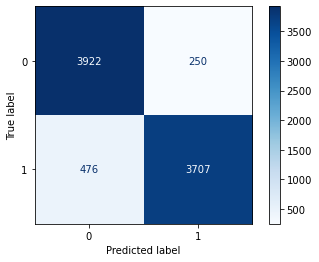

In [158]:
# Logistic regression train result
clf(X_train, y_train, lr)

                   precision    recall  f1-score   support

Existing Customer     0.8992    0.9343    0.9164      1796
Attrited Customer     0.9312    0.8947    0.9126      1785

         accuracy                         0.9145      3581
        macro avg     0.9152    0.9145    0.9145      3581
     weighted avg     0.9152    0.9145    0.9145      3581



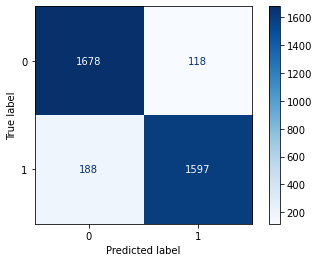

In [159]:
# Logistic regression test result
clf(X_test, y_test, lr)

The logistic regression's precision, recall, and f1-score are same as those of the model with missing values.

### 2. Random Forest without missing values

In [169]:
#from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200, random_state=123)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=123)

                   precision    recall  f1-score   support

Existing Customer     1.0000    1.0000    1.0000      4172
Attrited Customer     1.0000    1.0000    1.0000      4183

         accuracy                         1.0000      8355
        macro avg     1.0000    1.0000    1.0000      8355
     weighted avg     1.0000    1.0000    1.0000      8355



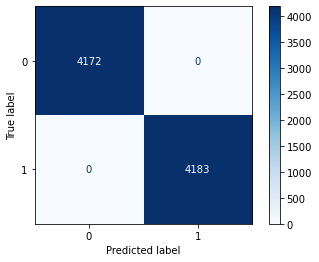

In [170]:
# Random forest train result
clf(X_train, y_train, rf)

                   precision    recall  f1-score   support

Existing Customer     0.9849    0.9783    0.9816      1796
Attrited Customer     0.9783    0.9849    0.9816      1785

         accuracy                         0.9816      3581
        macro avg     0.9816    0.9816    0.9816      3581
     weighted avg     0.9816    0.9816    0.9816      3581



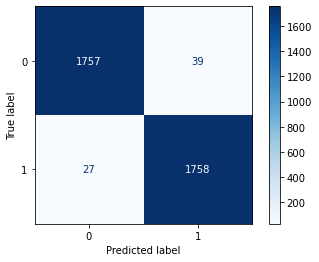

In [171]:
# Random forest test result
clf(X_test, y_test, rf)

Random forest still shows an overfitting issue, but the recall score is improved compared to the recall score of the model with missing values.

### 3. XGBoost without missing values

In [163]:
#from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators = 500, max_depth = 3, random_state=123)
xgb.fit(X_train, y_train)

[21:21:06] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=8, num_parallel_tree=1, random_state=123,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

                   precision    recall  f1-score   support

Existing Customer     1.0000    1.0000    1.0000      4172
Attrited Customer     1.0000    1.0000    1.0000      4183

         accuracy                         1.0000      8355
        macro avg     1.0000    1.0000    1.0000      8355
     weighted avg     1.0000    1.0000    1.0000      8355



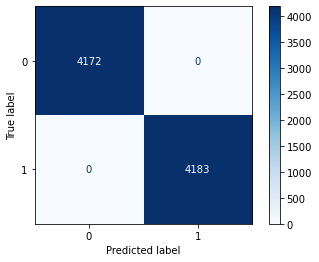

In [164]:
# XGBoost train result
clf(X_train, y_train, xgb)

                   precision    recall  f1-score   support

Existing Customer     0.9833    0.9861    0.9847      1796
Attrited Customer     0.9860    0.9832    0.9846      1785

         accuracy                         0.9846      3581
        macro avg     0.9846    0.9846    0.9846      3581
     weighted avg     0.9846    0.9846    0.9846      3581



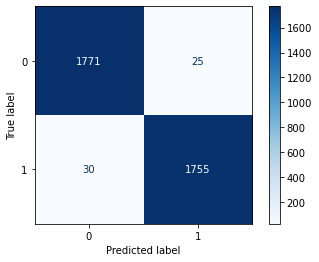

In [165]:
# XGBoost test result
clf(X_test, y_test, xgb)

XGBoost also has an overfitting issue and the recall score gets worse compared to the recall score of the model with missing values.

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

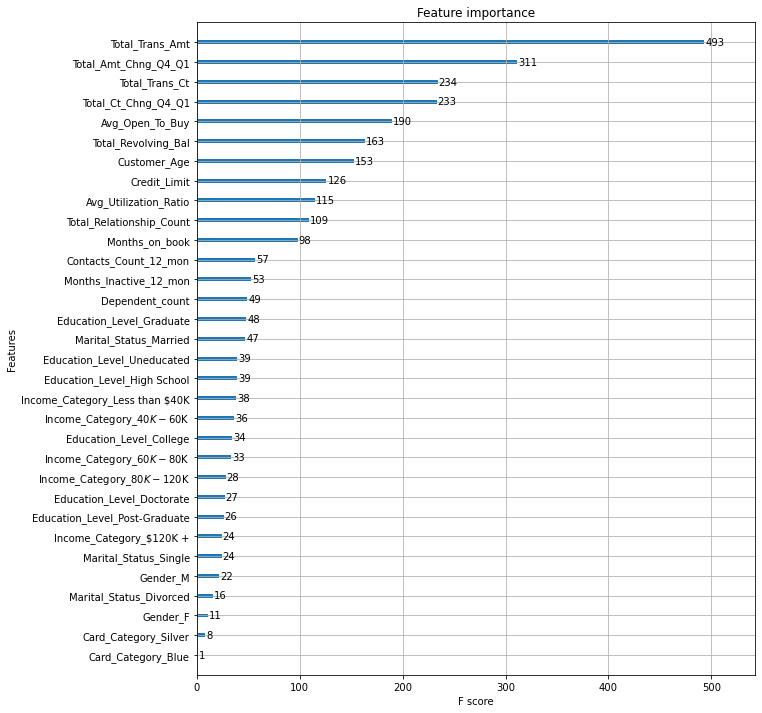

In [108]:
#from xgboost import plot_importance
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb, ax=ax)

XGBoost has same top four important features with and without missing values.

### 4. CatBoost without missing values

In [172]:
#from catboost import CatBoostClassifier

cat = CatBoostClassifier(loss_function='Logloss',random_state = 123, iterations =200, verbose = 0)
cat.fit(X_train, y_train)

                   precision    recall  f1-score   support

Existing Customer     0.9990    0.9983    0.9987      4172
Attrited Customer     0.9983    0.9990    0.9987      4183

         accuracy                         0.9987      8355
        macro avg     0.9987    0.9987    0.9987      8355
     weighted avg     0.9987    0.9987    0.9987      8355



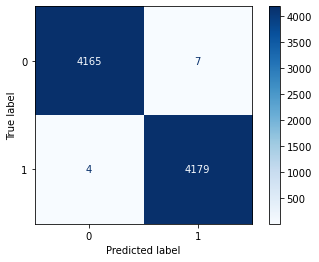

In [173]:
# CatBoost train result
clf(X_train, y_train, cat)

                   precision    recall  f1-score   support

Existing Customer     0.9828    0.9839    0.9833      1796
Attrited Customer     0.9837    0.9826    0.9832      1785

         accuracy                         0.9832      3581
        macro avg     0.9832    0.9832    0.9832      3581
     weighted avg     0.9832    0.9832    0.9832      3581



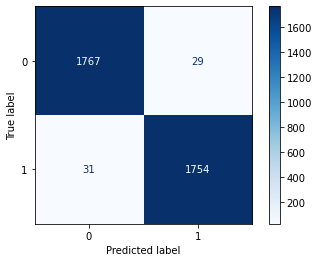

In [174]:
# CatBoost test result
clf(X_test, y_test, cat)

CatBoost's recall score gets worse without missing values compared to the recall score of the model with missing values.